In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Camiloez/Labs-Data-Mining/master/Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = df.iloc[:, [1, 2, 3, 4]].values
y = df.iloc[:,[5]].values

## 1. PCA para visualización

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

pcadf = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])
pcadf['target']=y

In [6]:
pcadf.head(5)

,PCA 1,PCA 2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


In [8]:
pcadf.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
def color(x):
    if x=='Iris-setosa':
        return 'red'
    elif x=='Iris-versicolor':
        return 'blue'
    elif x=='Iris-virginica':
        return 'green'

In [9]:
pcadf['color']=pcadf.target.apply(color)
pcadf.head(5)

,PCA 1,PCA 2,target,color
0,-2.684207,0.326607,Iris-setosa,red
1,-2.715391,-0.169557,Iris-setosa,red
2,-2.889820,-0.137346,Iris-setosa,red
3,-2.746437,-0.311124,Iris-setosa,red
4,-2.728593,0.333925,Iris-setosa,red


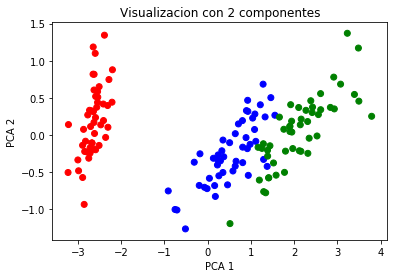

In [10]:
plt.scatter(pcadf['PCA 1'], pcadf['PCA 2'], c=pcadf.color)
plt.title('Visualizacion con 2 componentes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 2. K-Means

In [12]:
kmeans = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans=kmeans.fit(x)
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [13]:
#Centroides
y_kmeans.cluster_centers_

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

In [14]:
#Inertia para el método del codo
y_kmeans.inertia_

57.31787321428571

###  2.1 Visualización Centroides

In [15]:
Attributes =list(df.columns.values[1:5])
AttNo = len(Attributes)
values = df.iloc[3,1:5].tolist()
print(values)
values += values[:1]
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

[4.6, 3.1, 1.5, 0.2]


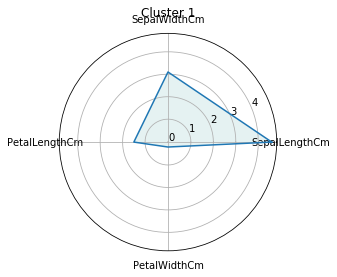

In [16]:
ax = plt.subplot(111, polar=True)

#Agregar las labels
plt.xticks(angles[:-1],Attributes)

#Plottear el radar
ax.plot(angles,values)

#Relleno de áreas calculadas
ax.fill(angles, values, 'teal', alpha=0.1)
ax.set_title("Cluster 1")
plt.show()

## 3 Hierarchical Clustering

In [18]:
linkage?

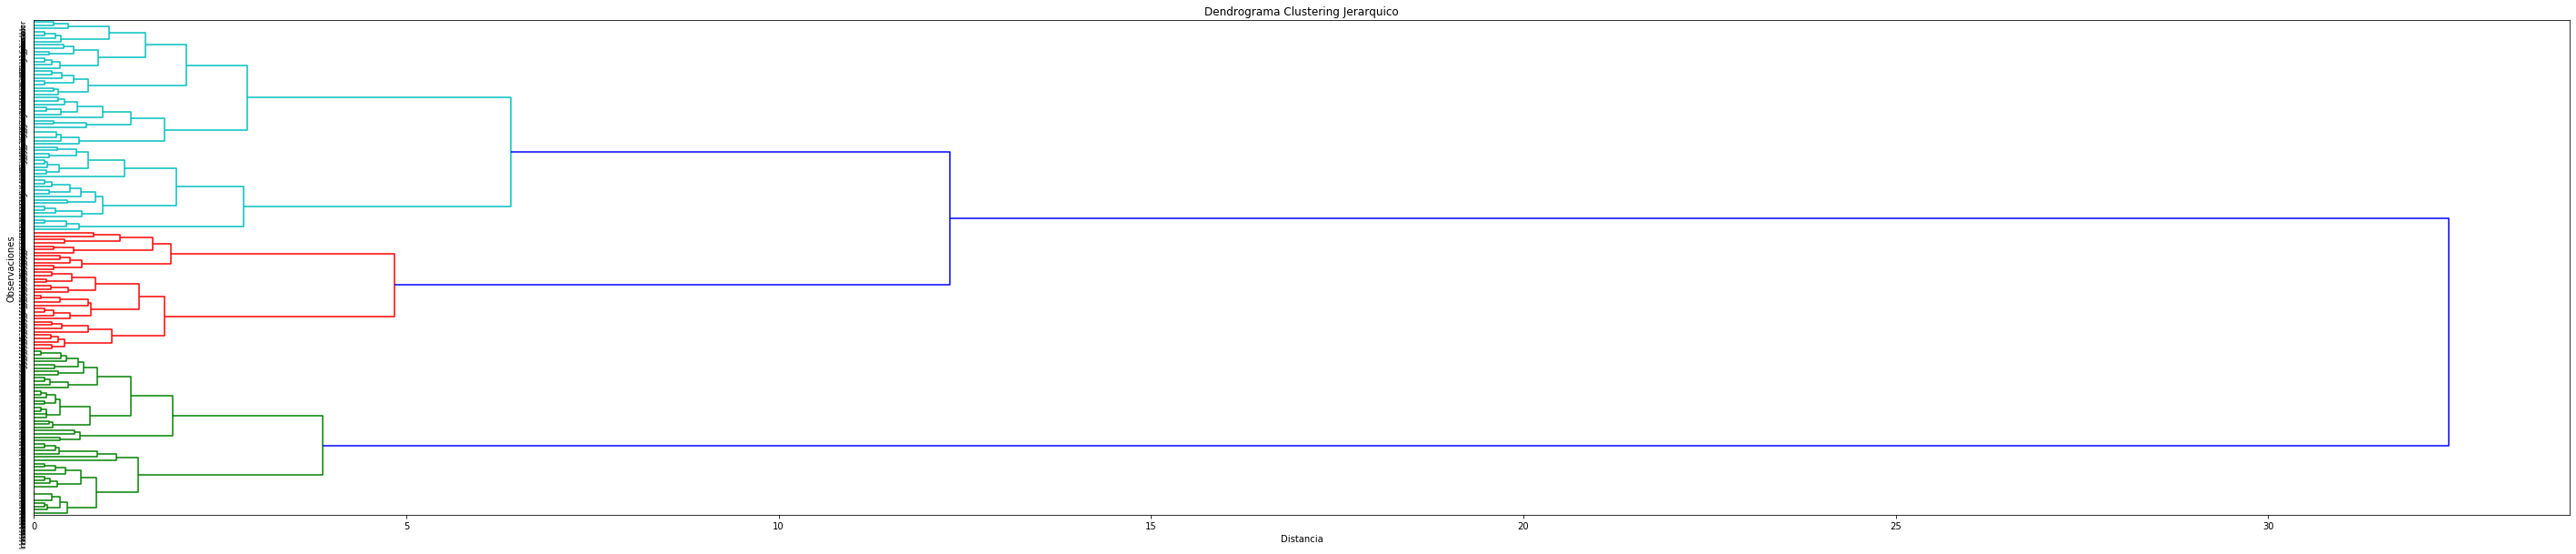

In [19]:
colors=list(pcadf.color)
Z = linkage(x, 'ward')
plt.figure(figsize=(50, 10))
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('Observaciones')
plt.xlabel('Distancia')


dendrogram(Z, labels=list(df.Species),leaf_rotation=90.,leaf_font_size=8.,orientation='right',color_threshold=10,)
plt.show()